In [2]:
import os
os.getcwd()

'/home/darshit'

- ### RELIANCE Data from 4 Jan 2000 to 30 April 2021

## Step 1: Load the CSV file

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('nifty_data/RELIANCE.csv')
print(df.shape)
df.head()

(5306, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


## Step 2:Clening the Data

In [4]:
df['Date']=pd.to_datetime(df['Date'])
#Sort by date (just in case)
df=df.sort_values('Date')
#Drop columns you don't need (like series)
df=df.dcrop(columns=['Series'], errors='ignore')
#optional: Drop un named index columns if any
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]
#Check for missing values
print(df.isnull().sum())
df.head()

Date                     0
Symbol                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64


,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


## Step 3: Univariate Analysis

### 3.1 Basic Statistics

In [5]:
df.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.792000e+03,4792.000000
mean,2010-08-18 21:26:56.132679936,1010.984866,1012.602375,1026.823803,996.886977,1011.157143,1011.316839,1011.937409,5.583028e+06,6.076715e+14,1.452306e+05,2.280885e+06,0.435039
min,2000-01-03 00:00:00,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295543e+12,2.991000e+03,2.909700e+04,0.076300
25%,2005-04-13 12:00:00,572.137500,572.925000,582.950000,564.237500,572.062500,572.512500,573.190000,2.836454e+06,2.203354e+14,7.215900e+04,1.194524e+06,0.323325
50%,2010-08-17 12:00:00,937.950000,939.000000,950.075000,927.550000,939.025000,938.275000,939.785000,4.213432e+06,3.662999e+14,1.021435e+05,1.810434e+06,0.449450
75%,2015-12-17 18:00:00,1247.387500,1247.675000,1267.350000,1227.450000,1248.287500,1248.275000,1247.375000,6.602604e+06,6.656490e+14,1.686702e+05,2.752935e+06,0.544300
max,2021-04-30 00:00:00,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473434e+16,1.428490e+06,3.495888e+07,0.978300
std,NaN,570.987079,572.575893,581.986757,560.703328,570.938608,571.046753,571.222520,4.983793e+06,8.369739e+14,1.297557e+05,1.882665e+06,0.144722


### 3.2 check Data Types

In [6]:
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

### 3.3 Plot Distributions

#### Distributions of Closing Prices

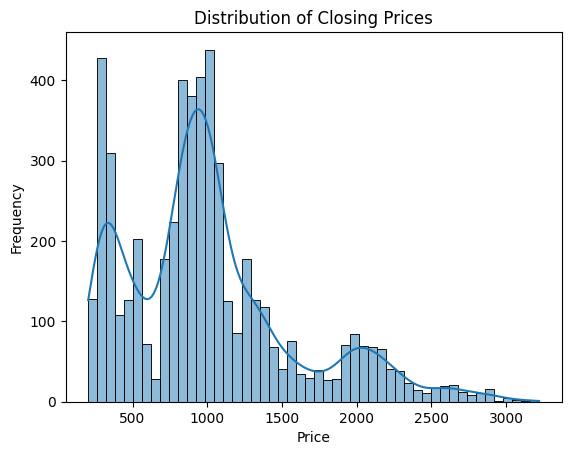

In [7]:
import seaborn as sns

sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distributions of Open Price

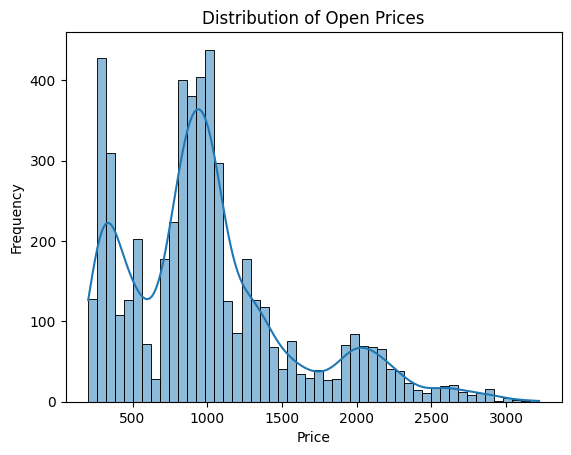

In [8]:

sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Open Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distributions of High Price

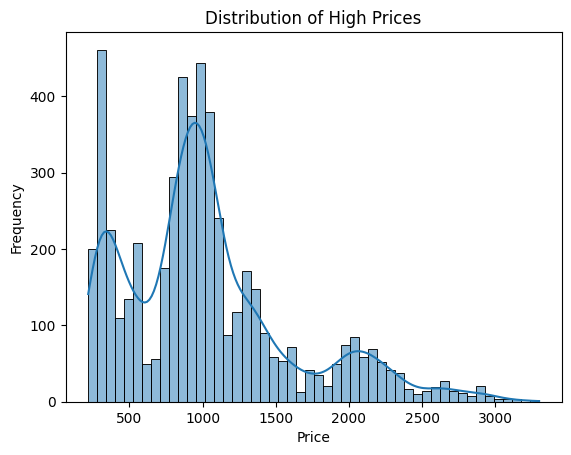

In [9]:
sns.histplot(df['High'], kde=True, bins=50)
plt.title('Distribution of High Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distributions of Volume

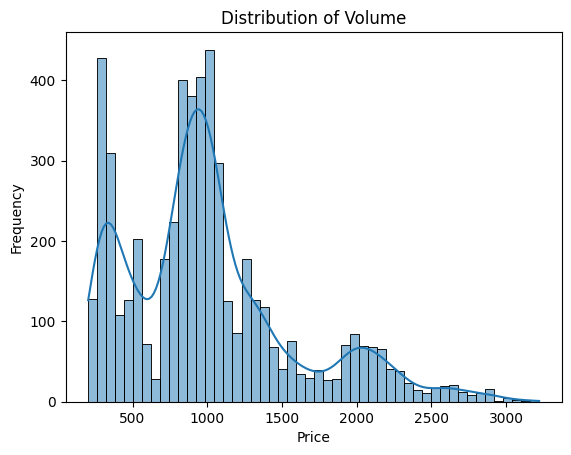

In [10]:

sns.histplot(df['Close'], kde=True, bins=50)
plt.title('Distribution of Volume')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Step 3.5: Time Trend(price vs time)

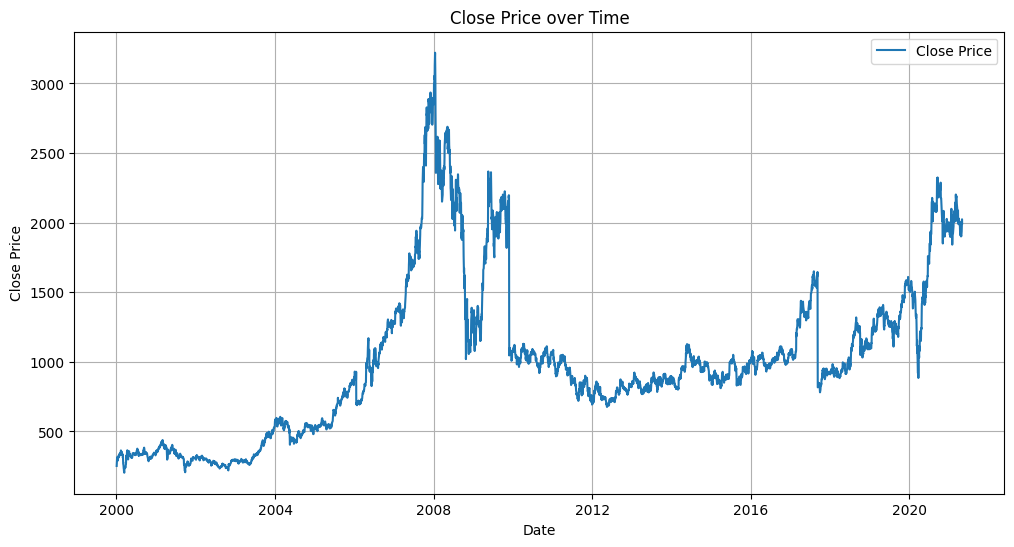

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.legend()
plt.grid(True)
plt.show()

### 3.6: Handling Missing Values or 0 values in volume/trades

In [12]:
print(df[['Volume', 'Trades', 'Deliverable Volume']].isnull().sum())
print((df[['Volume', 'Trades']]==0).sum())

Volume                   0
Trades                2850
Deliverable Volume     514
dtype: int64
Volume    0
Trades    0
dtype: int64


### Step 3.7: Distribution Analysis (key Columns to Analyse: 'Close', 'volume', 'Turnover', 'VWAP')
- VWAP: stands for volume weighted Average Price.It reflects the average trading price weighted by volume.

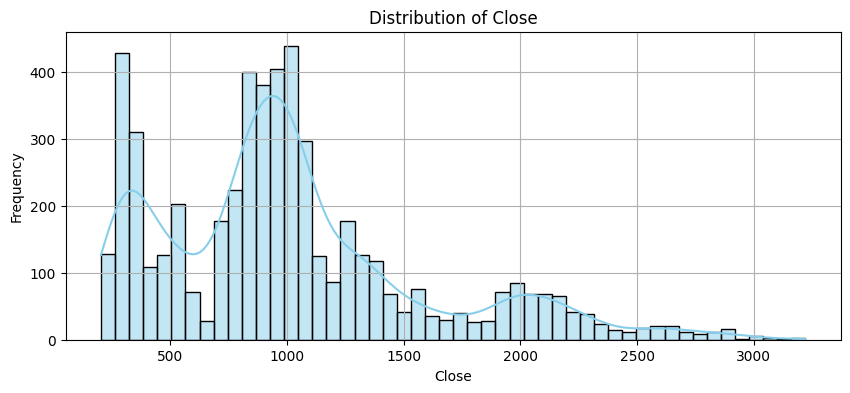

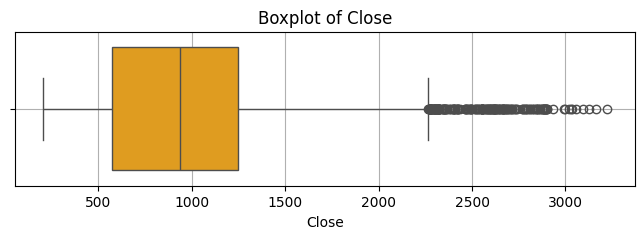

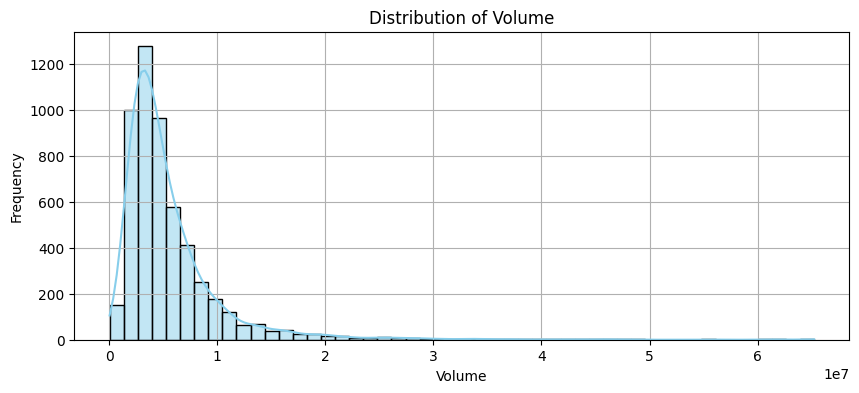

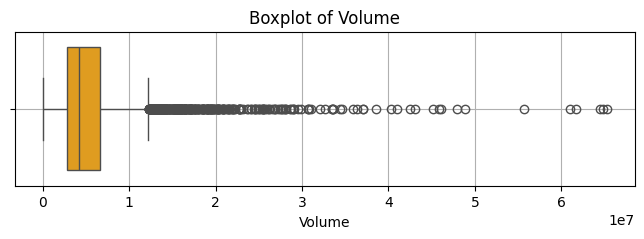

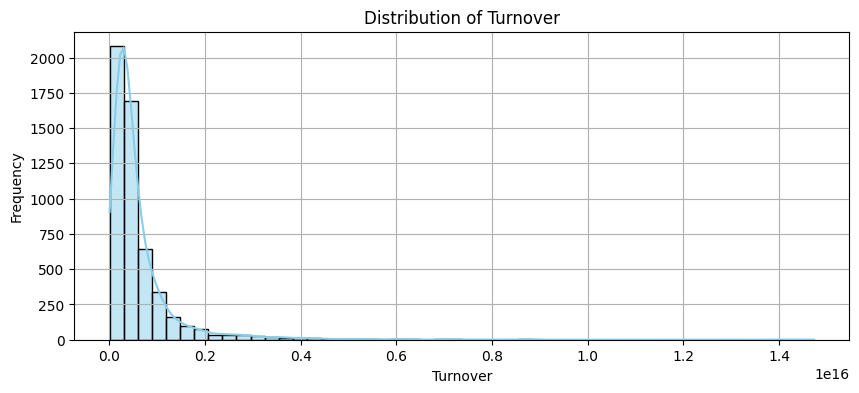

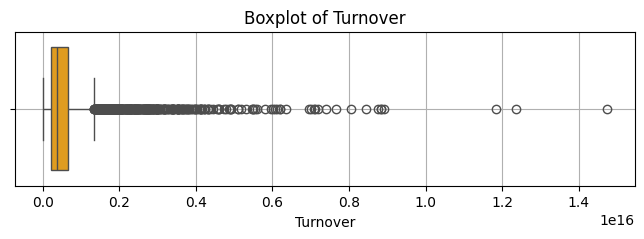

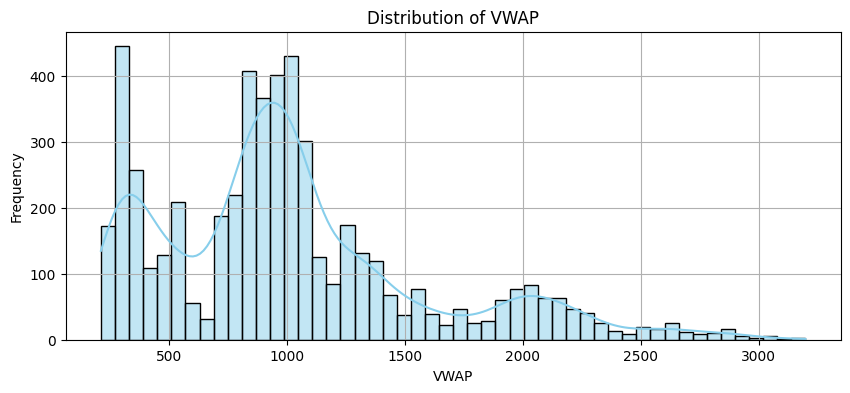

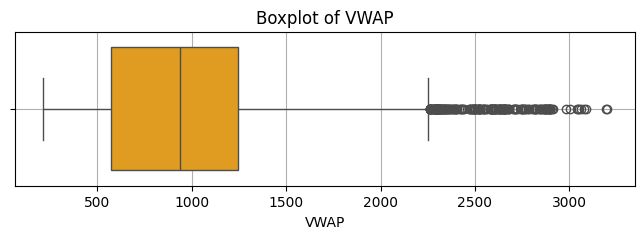

In [13]:
cols=['Close', 'Volume', 'Turnover', 'VWAP']
for col in cols:
    plt.figure(figsize=(10,4))
    
    #Histogram with KDE
    sns.histplot(df[col], kde=True, bins=50, color= 'skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    #Boxplot to detect outliers
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}' )
    plt.grid(True)
    plt.show()


## Distribution Insights:
* 'Close' and 'VWAP' show multi-modal and non-normal distributions, with peaks around key price zones.
  -> Their right tails are mild, showing fewer extreme outliers-indicating price stability around dominant levels most of the time .
* 'Volume' and 'Turnover' are left-skewed with heavier right tails, meaning extreme spikes in trading activity ocassionally
  occur.
  -> These fat right tails show that while most trading activities is low, there are some extreme high values far on the right,
  and clearly having more outliers than the 'Close' and 'VWAP'

### Step 3.8-Time-Series Trends & Rolling Metircs

#### 1.Monthly Average Close Price trend

<Axes: title={'center': 'Monthly Avg Close Price (Reliance)'}, xlabel='Month', ylabel='Close Price'>

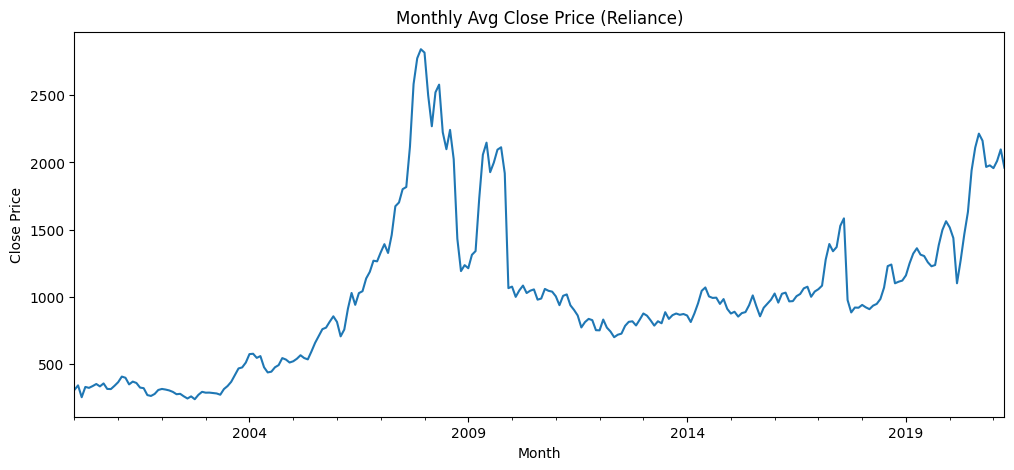

In [14]:
monthly_avg= df.groupby(df['Date'].dt.to_period('M'))['Close'].mean()
monthly_avg.plot(figsize=(12,5), title='Monthly Avg Close Price (Reliance)' ,ylabel='Close Price', xlabel='Month')

#### Insights:
* From 2002 to late 2006,Reliance showed a steady uptrend, gradually rising from around 20B9275.
* In early 2006 to end of 2007 or the start of 2008, a sharp bullish regime occurred- the price accelerated and peaked
  near 2300 by the start of 2008.
* The 2008 global financial crisis triggered a dramatic fall, dropping to nearly 1250 by the end of that year- a clear downward
  regime shift.
* A srong recovery followed in 2009, with price rising again towards 2150 to 2200.
* By the late 2009 ,another sharp correction began, bringing prices down to ~1000 by 2010 start.
* From 2010 to 2017 the market moved sideways,with minor ups and downs - suggesting a consolidation phase. Then again at the onset of 2017 it had regime shift upwards till mid 2017 and 2018.
* Ultimately, over the two-decade span, Relaince close price grew from ~275 in 2000 to nearly 2000+ in 2021, showing long term growth despite cyclic volatility.

#### 2. Rolling Mean & Volatility(std)
- A rolling mean smooths the price data over a defined window (e.g., 20 days) to show long term trends.
- df.rolling(window=20).mean(): This calculates the moving average of a column over a 20-day sliding window.

<Axes: title={'center': 'Close Price with 20-Day Rolling Avg & Volatility'}, xlabel='Date'>

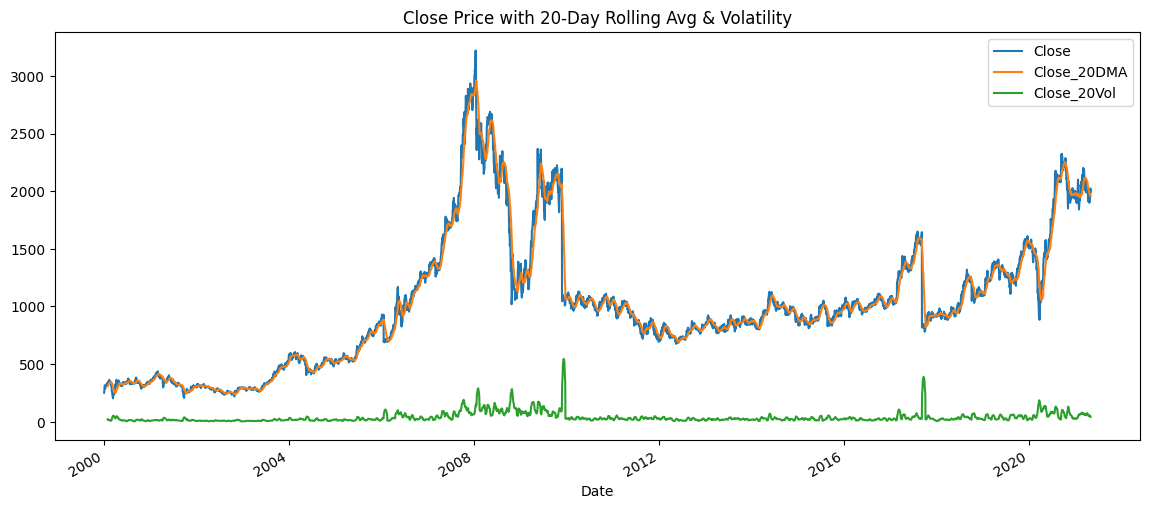

In [15]:
df['Close_20DMA']= df['Close'].rolling(window=20).mean()
df['Close_20Vol']= df['Close'].rolling(window=20).std()

df[['Date', 'Close', 'Close_20DMA', 'Close_20Vol']].set_index('Date').plot(figsize=(14,6), 
    title= 'Close Price with 20-Day Rolling Avg & Volatility')

#### Insights:-
##### Volatility:
* From 2002 to 2008, volatility remained mostly low and stable, indicating a calm market phase.In the early 2010's, a sarp spike in volatility is obsevered- suggesting a period of high market uncertainty or rapid market movement.
* Post this spike, the market entered entered a highly consolidated phase with minimum volatility. Another major spike around 2018 marks renewed activity or disruption .
* After 2020, volatility picked again slightly, indicating mild fluctuations in the later phase.

##### Closing Price and 20-Day Moving Average(DMA):
 The 20-DMA smooths out short-term fluctuations and helps visualize broader price trends.
 - During long consolidation phases, the close and DMA lines move closely together , indicating stability.
 - When the close price crosses **above** the DMA, it often precedes an **upward movement** (potential bullish signal).
 - When the close price crosses **below** the DMA, it can precede a **downtrend** (potential bearish signal).
 - Several such crossovers can be observed in the dataset, signaling trend shifts across different years.


#### 3. Yearly Aggregated Volume

<Axes: title={'center': 'Total Traded Volume per Year'}, xlabel='Year'>

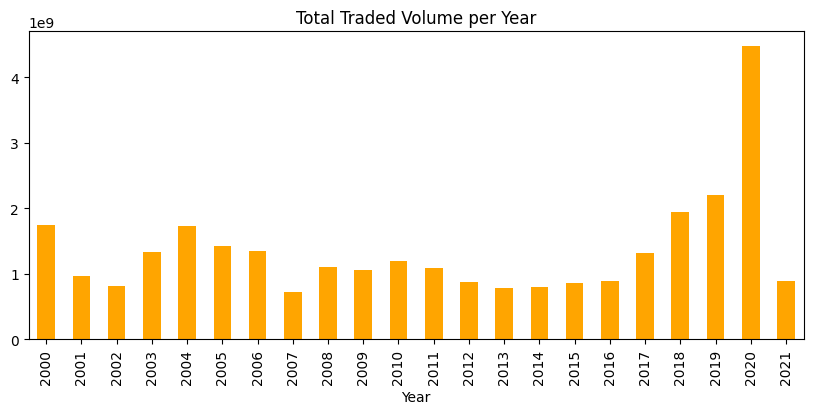

In [16]:
df['Year']= df['Date'].dt.year
yearly_volume= df.groupby('Year')['Volume'].sum()
yearly_volume.plot(kind='bar', figsize=(10,4), title='Total Traded Volume per Year', color='orange')

#### Insights:
The yearly total traded volume helps identify periods of high market activity.
- The **highest volume** was observed in **2020** , likely due to increased retail and institutional participation during the COVID-era market shifts.
- The **lowest volume** appears around**2007** , suggesting relatively calm or lower participation.
- Volume spikes can align with **bull or bear markets**, or external triggers like crises, budget events, or major policy changes.
- Sustained higher volume may signal increased investor confidence or risk appetite.

## Step 4: Bivariate Analysis

### Step 4.1: Correlation and Inter-feature Analysis
- cmap='coolwarm': dark red indicates strong positive correlation, dark blue indicates strong negative, and white /pale indicates near zero correlation.
- for e.g.-> To check correlation between close and vwap:
  1. Find the row labeled close.
  2. Move horizontally across that row until you reach the column labeled VWAP.The value in that cell is the correlation between Close and      VWAP.
- df.corr(numeric_only=True): Computes the **correlation matrix** between all numeric columns in the dataframe df.
  - It computes the **Pearson correlation coefficient** between every pair of numeric columns. 
  - Returns a squared table(matrix) where each cell [i][j] represents correlation between feature i and feature j
  - **Pearson correlation** :measures the linear relationship between two variables .The result is a value between -1 and +1:
    - +1= perfect **positive** linear relationship(as one goes up, the other goes up)
    - -1= perfect **negative** linear relationship(as one goes up, the other goes down)
    - 0=no linear relationship
    - numeric_only=True skips non-numeric columns like 'Symbol' or 'Date'

- plt.figure(figsize=(10,8)): Sets the figure size in inches (10wide* 8high)
- sns.heatmap(....): Plots the correlation matrix as a color-coded grid
  - annot=True-> shows correlation values in each cell
  - fmt=".2f"-> formats those numbers to 2 decimal places
  - cmap='coolwarm': blue to red color pallete
  - linewidth=0.5-> adds thin lines between cells for clarity
- plt.title(...): Adds a title above the heatmap
- plt.show(): Displays the final plot 

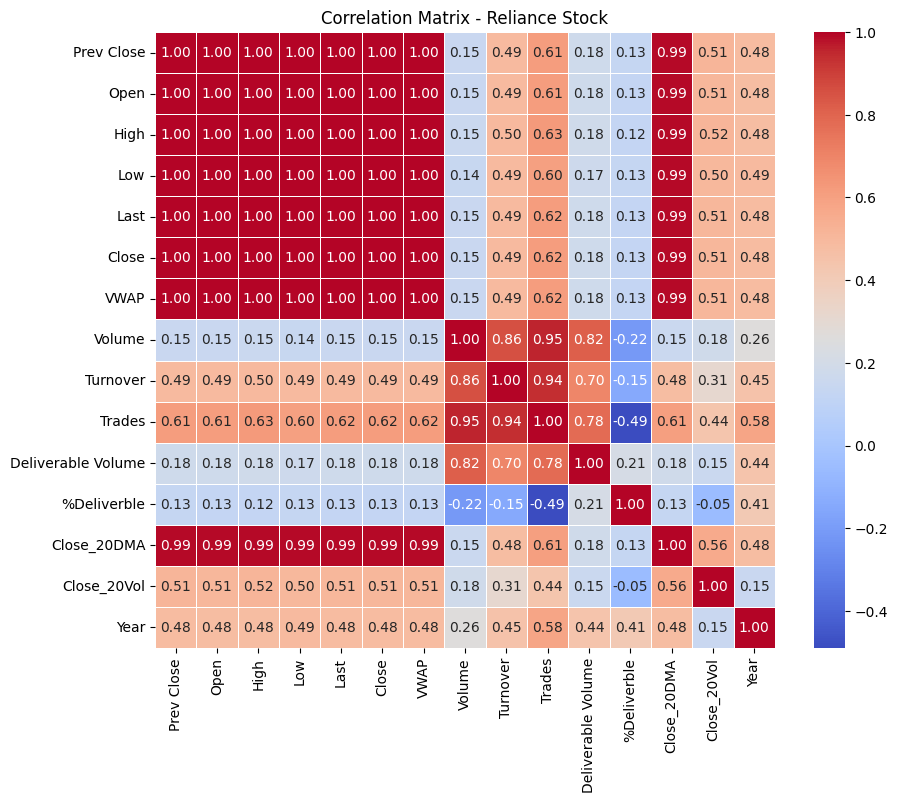

In [17]:
#compute correlation matrix
corr= df.corr(numeric_only=True)

#Plot Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths= 0.5)
plt.title("Correlation Matrix - Reliance Stock")
plt.show()

#### Insights:
- Strong positive correlations are seen among Open,High,Low,Last,Close, and VWAP,indicatiing these price-based features move in sync.
- Volume,Turnover and Trades also exhibit high mututla correlation , reflecting aligned spikes in overall trading activity.
- The most significant negative correlation is between **% deliverable and trades**, with a value of **-0.49** .This suggests that **as the number of trades increases , the percentage of shares actually delivered (held beyond intraday) decreases-** possibly indicating **more speculative or intraday trading** during high activity periods.
- Price columns show no strong negative correlation with any other variables- highlighting consistency in price movements.

- Last Price= The price of the **final trade** before the market closes.
- Close Price= The **official price** calculated by the exchange- often a **weighted average** of prices in the **last few** minutes of trading(e.g., VWAP from 3:00 to PM to 3:30 PM for NSE).
- So, **if the last trade is at 505** and the average of final trades is 500,
  -> Last= 505
  -> Close= 500
- That's why they **can differ slightly** , especially on volatile days.
- The **Open price** of tomorrow is decided by **pre-market orders** and supply-demand balance before opening -not directly by the last or close price of today.
- It may open **higher or lower** depending on overnight news, global market trends, or gaps

### Step 4.2:Scatter Plots for Bivariate Analysis

#### 1. Close vs Volume

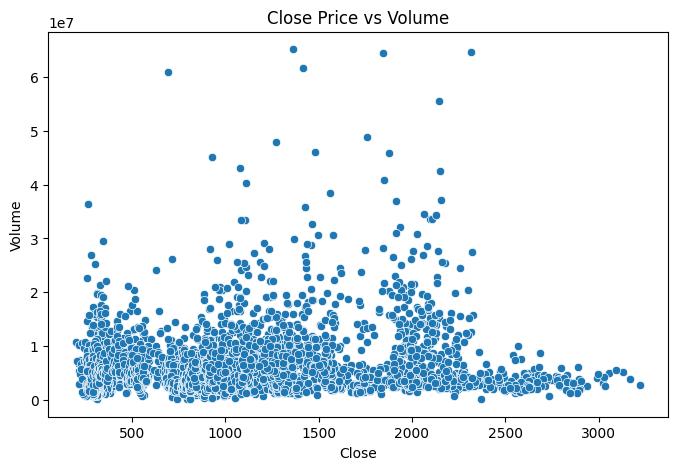

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Close', y='Volume', data=df)
plt.title('Close Price vs Volume')
plt.show()

#### Insights:
- Most trading activity(volume) is consolidated between 0 to 2e7, regardless of the close price level
- As the Close price increases, the Volume remains relatively stable in that range.
- A few outlier points appear appear above 3e7, likely reflecting volume spikes during specific events or news-driven days.
- These spikes may indicate unusual investor interest or institutional activity at those price levels.

#### 2.Close vs VWAP

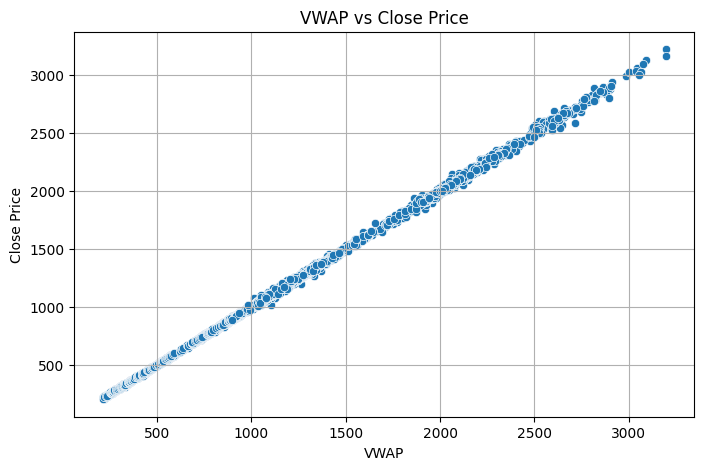

In [19]:
#vwap= volume weighted average price
#close= final declared price of the day
plt.figure(figsize=(8,5))
sns.scatterplot(x='VWAP', y='Close', data=df)
plt.title('VWAP vs Close Price')
plt.xlabel('VWAP')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#### Insights:
- If Close~VWAP, it suggests normal trading without last-minute manipulation.If they differ significantly, it could point to institutional price movement toward the close.
- This plot shows a strong positve linear relationship between VWAP and Close price, suggesting that the daily closing prices are largely aligned with the volume-weighted average throughout the day. This indicates a stable trading pattern with no large end-of-day price distortions.

#### 3. Volume vs %Deliverable 
This helps us understand the nature of trading volume:
- Volume= Total number of shares traded on a day(intraday + delivery)
- %Deliverable= Percentage of that volume actually delivered (i.e., not squared off intraday )
- A high %Deliverable with high Volume often means long-term investor interest.
- Low %Deliverable and high Volume could suggest speculative intraday trading. 

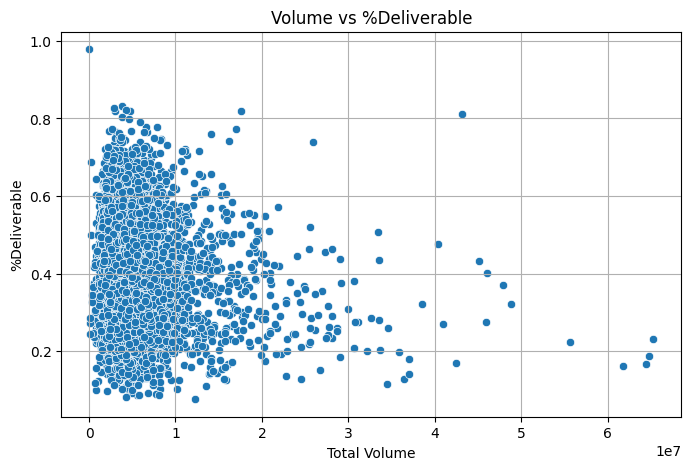

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Volume', y='%Deliverble', data=df)
plt.title('Volume vs %Deliverable')
plt.xlabel('Total Volume')
plt.ylabel('%Deliverable')
plt.grid(True)
plt.show()

#### Insights:
- Most trading volume is consolidated between 0 to 2*10^7, within which %Deliverable also clusters below 0.8, showing retail or regular investor behaviour.
- A vertical cluster in this range indicates days with varying %Deliverable despite similar total volumes,possibly reflecting a mix of intraday and delivery-based trades.
- Outliers with very high volume tend to show lower %Deliverable, suggesting heavy intraday trading activity,possibly from institutional traders or proprietary trading desks.
- Overall, there is a slight inverse relationship- as volume spikes , the proportion of the deliverable trades tends to drop,reflecting speculative behaviour on high-volume days.

### Step 4.3: Pairplot of key numerical variables
- What is a Pairplot?
  A pairplot is a grid of scatterplots and histograms that shows relationships betweeen all pairs of selected numerical variables. It helps    identify:
- Linear/Non-linear trends
- Clusters
- Correlation patterns
- Outliers
- Any strong multivariate patterns

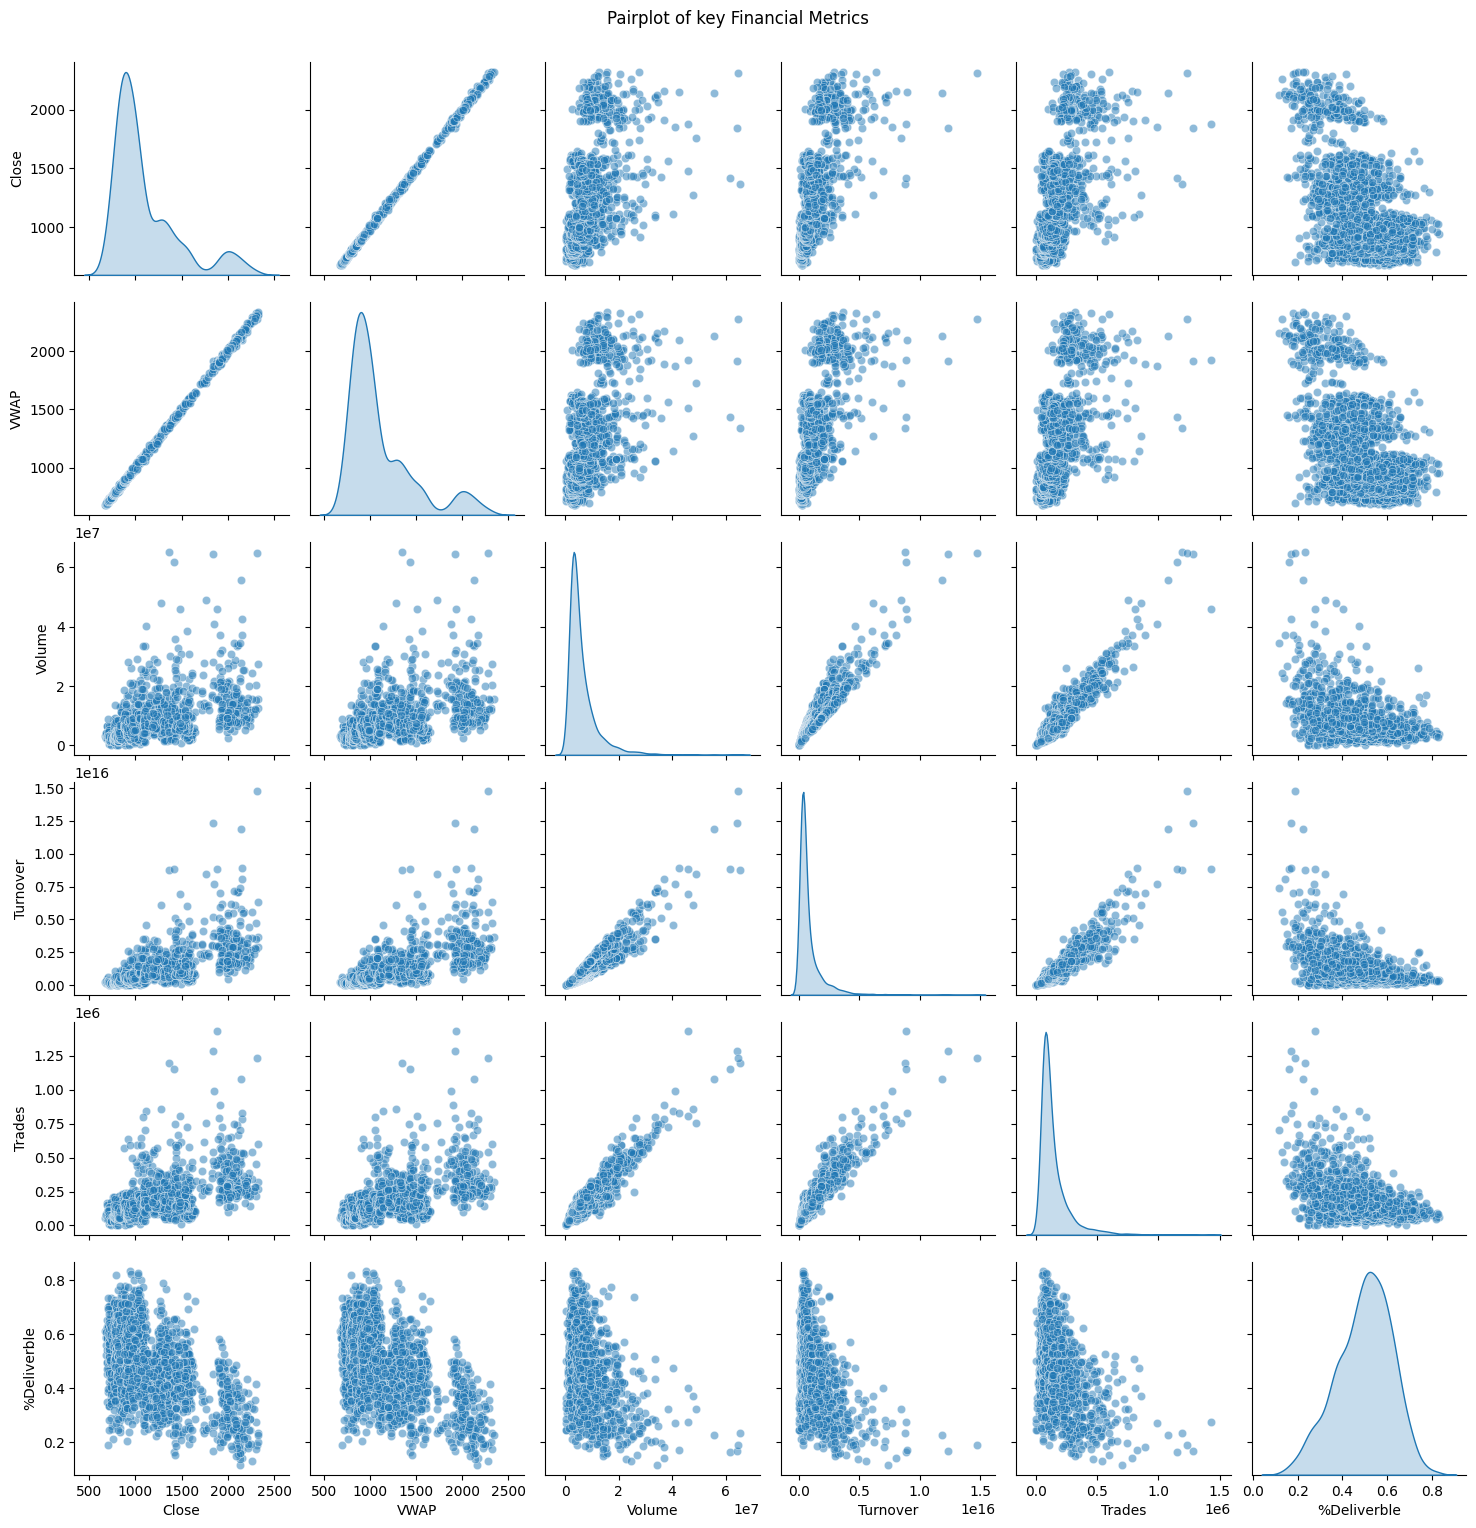

In [21]:
#picking 5-6 most important ones

# Subset the dataframe for selected numeric columns
selected_cols=['Close', 'VWAP', 'Volume', 'Turnover', 'Trades', '%Deliverble']

# Drop any rows with mssing values in these columns
df_subset=df[selected_cols].dropna()

#Plot the pairplot
sns.pairplot(df_subset,diag_kind='kde', plot_kws={'alpha': 0.5}) #creates a grid of scatter plots and KDEs.'diag_kind=kde':shows smooth
                                                                #ditribution curve along the diagnols.
                                                    #'plot_kws={alpha=0.5}':Makes points semitransparent for overlapping
plt.suptitle("Pairplot of key Financial Metrics", y=1.02)#adds a title with spacing from the top

plt.show()

## Step 5: Summary and Key Questions
- This notebook presents a full Exploratory Data Analysis(EDA) of Reliance stock using data from 2000 to 2021.
- We analyzed price trends, volume dynamics, volatility, correlations, and delivery patterns.
- Observed patterns like regime shifts, volatility spikes, and institutional vs retail activity zones.
- Strong positive relationships between close, vwap, Turnover.
- Delivery % shows negative corrleation with total volume , indiacting heavy intraday trading n high volume periods.
- This notebook is Part 1 of a full NIFTY 50 EDA.
  **Next Notebook** will extend this to all stocks for industry-level insights.

### Few Questions from the dataset:
1. In which month Reliance gave highest return from 2020-2021?
   - ANS: **April of 2020 ,with 31.63% reuturn**

- pct_change() calculates the **percentage change** between the current and the previous row.
- Formula:
  - pct_change = (Current Value - Previous Value)/Previous Value

- abs(): ensures we measure **magnitude** of movement, not direction (whether price went up or down).

- idxmax() gives the timestamp (month) where volatility was max

In [22]:
#1. Ensure 'date' is in datetime format(df['date'] = pd.to_datetime['date'] )

#2. Filter the data for the years 2020 and 2021
df_filtered = df[(df['Date'].dt.year >=2020) & (df['Date'].dt.year <=2021)].copy()

#3. Create a column for daily returns using pct_change on 'close'
df_filtered['daily_return'] = df_filtered['Close'].pct_change()

#4. Create a 'Year-Month' column for grouping
df_filtered['Month'] = df_filtered['Date'].dt.to_period('M')

#5. Calculate monthly return: we group by 'month' and compund the daily returns
monthly_returns = (df_filtered.groupby('Month')['daily_return'].apply(lambda x: (1+x).prod() -1 )) #Geometric return

#6. Find the month with highest returns
best_month = monthly_returns.idxmax()
best_return = monthly_returns.max()

#7. Display result
print(f"Highest return month: {best_month}->  Return: {best_return:.2%}")


Highest return month: 2020-04->  Return: 31.63%


In [23]:
df_filtered

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close_20DMA,Close_20Vol,Year,daily_return,Month
4974,2020-01-01,RELIANCE,1514.05,1518.00,1527.10,1505.50,1511.80,1509.60,1515.23,6402372,9.701063e+14,122265.0,1523290.0,0.2379,1558.2075,25.853908,2020,NaN,2020-01
4975,2020-01-02,RELIANCE,1509.60,1512.00,1540.95,1512.00,1534.10,1535.30,1530.86,8096561,1.239471e+15,151727.0,3386321.0,0.4182,1557.3375,26.337235,2020,0.017024,2020-01
4976,2020-01-03,RELIANCE,1535.30,1533.00,1541.65,1523.00,1536.00,1537.15,1532.73,9593498,1.470428e+15,149003.0,5288843.0,0.5513,1556.6525,26.690637,2020,0.001205,2020-01
4977,2020-01-06,RELIANCE,1537.15,1520.00,1527.90,1498.00,1499.90,1501.50,1512.57,11209343,1.695494e+15,225138.0,6398638.0,0.5708,1553.9825,29.407805,2020,-0.023192,2020-01
4978,2020-01-07,RELIANCE,1501.50,1519.00,1534.50,1513.50,1526.95,1524.60,1523.12,7627191,1.161710e+15,180713.0,3049916.0,0.3999,1551.5825,29.764940,2020,0.015385,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,RELIANCE,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445,1966.2800,47.610894,2021,0.017591,2021-04
5302,2021-04-27,RELIANCE,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088,1963.3475,44.029495,2021,0.026215,2021-04
5303,2021-04-28,RELIANCE,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963,1963.6400,44.244918,2021,0.004350,2021-04
5304,2021-04-29,RELIANCE,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527,1965.1100,45.790813,2021,0.013393,2021-04


2. Which month was most volatile? And in that month which day had the highest volatility?
   - Ans:  **Most Volatile Month: October 2008<br>
              Day with Highest Volatility: 2008-10-24<br>
              Volatility on that Day: 0.16273149098673678**

In [ ]:
# Step 1: make sure 'date' is datetime and set as index(already done)

# S tep 2: Calculate daily returns (if not already present)
df['daily_return'] = df['Close'].pct_change()

# Step 3: Calculate daily volatility as absolute return 
df['daily_volatility'] = df['daily_return'].abs()

# Step 4: Resample to monthly mean volatility
monthly_vol = df['daily_volatility'].resample('ME').mean()

# Step 5: Find the most volatile month 
most_volatile_month = monthly_vol.idxmax()

# Step 6: Filter the data for that month and find the max volatile day
most_volatile_day = df.loc[most_volatile_month.strftime('%Y-%m')]['daily_volatility'].idxmax()

# Final Output
print("Most Volatile Month:", most_volatile_month.strftime('%B %Y'))
print("Day with Highest Volatility:", most_volatile_day.strftime('%Y-%m-%d'))
print("Volatility on that Day:", df.loc[most_volatile_day, 'daily_volatility'])

- df['daily_volatility'].resample('ME').mean() means:
  - For each month, Group all daily volatilities, Compute their average(mean), And return it with the label set to the last day of that month.
  - 'ME': Month End
  - 'Ms': Month Start
  - 'M': Old code for month end end now deprecated
  - Because in Financial data, **Monthly summaries** like monthly return, monthly volatility, etc they're most naturally referenced by the **end-of-month date**, not the start.

3. On which weekdays %Deliverable was low despite good total trading volume i.e. days were the intraday trading was very high(top 2)?
   - **Ans**: **1. Friday<br>
                2. Tuesday** 

In [ ]:
# Step 1: Add weekday name
df['Weekday'] = df.index.day_name()

# Step 2: Filter only Monday to Friday
df_week = df[df['Weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Step 3: Group by weekday and compute average values
weekday_stats = df_week.groupby('Weekday')[['%Deliverble', 'Volume']].mean()

# Step 4: Rank by lowest %Deliverable and highest volume
result = weekday_stats.sort_values(by=['%Deliverble', 'Volume'], ascending=[True, False]).head(2)
print(result)


- Step 1: creates a new weekday column 'Weekday' from th date time index using day_name.
- Step 2: keeps only Mon-Fri using isin([....])-this completely avoids sat/sun,which were popped when used without the selction condition.
- Step 3: Groups 'Weekday' column and averages %deliverable and volume
- Step 4: we sort them as per the requirements of the question using 'sort_values' function

4. What was the best entry and exit time in the these 20 years for an investor?
   - **Ans: Best Entry Date: 2000-01-03 at rupees 237.50 (day low)<br>
 Best Exit Date: 2008-01-15 at rupees 3298.00 (day high)<br>
 Maximum Possible Profit per share: rupees 3060.50**

In [ ]:
# Step 1: Track best profit and corresponding dates
best_profit = 0
entry_date = exit_date = df.index[0]
low_entry_price = high_exit_price=0

# Step 2: Iterate through rows to find the best entry/exit based on low/high
for i in range(len(df)):
    entry_day = df.iloc[i]
    low_price = df.loc[entry_date, 'Low']

    # Search for highest high after this day
    future_highs = df.iloc[i+1:]['High']
    if not future_highs.empty:
        max_high = future_highs.max()
        exit_day = future_highs.idxmax()
        profit = max_high - low_price

        if profit > best_profit:
            best_profit = profit
            entry_date = df.index[i]
            exit_date = exit_day
            low_entry_price = low_price
            high_exit_price = max_high

# Step 3: Show result
print(f" Best Entry Date: {entry_date.date()} at rupees {low_entry_price:.2f} (day low)")
print(f" Best Exit Date: {exit_date.date()} at rupees {high_exit_price:.2f} (day high)")
print(f" Maximum Possible Profit per share: rupees {best_profit:.2f}")
        

- To simulate an ideal entry-exit scenario for maximum profit , we computed the pair of dates where the stock traded at its lowest intraday price followed by its highest intraday price later on. This helps understand the full potential, ignoring daily closes.